In [ ]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline


In [ ]:
df = pd.read_csv('waf.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [ ]:
df.head(15)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7
5,1,0.3,0.143921,-1,30,30,0.028231,-0.748282,AD,732,...,0,200.0,0,INTERNET,4.815073,windows,0,1,0,7
6,1,0.7,0.321554,-1,152,30,0.030680,-0.278994,AB,876,...,0,1500.0,0,INTERNET,1.558977,windows,1,1,0,7
7,1,0.9,0.064817,-1,18,50,0.034557,-1.265721,AB,901,...,0,200.0,1,INTERNET,2.637472,linux,0,1,0,7
8,1,0.7,0.065938,-1,64,40,0.020691,-1.442082,AB,933,...,0,1500.0,0,INTERNET,2.175419,windows,1,1,0,7
9,1,0.9,0.700096,-1,60,40,0.016809,-1.070271,AB,1176,...,0,200.0,0,INTERNET,24.040726,windows,0,1,0,7


In [ ]:
print(df.fraud_bool.value_counts())
print(df.income.value_counts())
print(df.name_email_similarity.value_counts())
print(df.customer_age.value_counts())
print(df.session_length_in_minutes.value_counts())
print(df.session_length_in_minutes.max())


0    988971
1     11029
Name: fraud_bool, dtype: int64
0.9    221419
0.1    157449
0.8    146650
0.6    111973
0.7    105109
0.4     81364
0.2     69345
0.5     55858
0.3     50833
Name: income, dtype: int64
0.092472    2
0.209896    2
0.100194    2
0.719966    2
0.721606    2
           ..
0.872371    1
0.880414    1
0.469313    1
0.125330    1
0.697452    1
Name: name_email_similarity, Length: 998861, dtype: int64
30    311433
20    245855
40    238712
50    140353
60     34770
10     20987
70      6517
80      1297
90        76
Name: customer_age, dtype: int64
-1.000000     2015
 9.661989        3
 2.463697        3
 5.323466        3
 13.152597       3
              ... 
 10.711273       1
 4.568166        1
 0.811755        1
 3.305473        1
 6.717022        1
Name: session_length_in_minutes, Length: 994887, dtype: int64
85.89914319274027


In [ ]:
count = 0
fraudBoolean = df["income"]
for (i,j) in fraudBoolean.iteritems():
  if j == 0:
    count += 1
print (count)


0


In [ ]:
count = 0
fraudBoolean = df["fraud_bool"]
for (i,j) in fraudBoolean.iteritems():
  if j == 0:
    count += 1
print (count)

fraudBoolean.value_counts()


988971


0    988971
1     11029
Name: fraud_bool, dtype: int64

In [ ]:
fraudArray = fraudBoolean.to_numpy().reshape((-1, 1))
incomeArray = df['income'].to_numpy()

model = LinearRegression()
model.fit(fraudArray, incomeArray)

r_sq = model.score(fraudArray, incomeArray)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")





coefficient of determination: 0.002032131972888651
intercept: 0.5613134257728489
slope: [0.12532181]


In [ ]:
fraudArray = fraudBoolean.to_numpy().reshape((-1, 1))
similarityArray = df['name_email_similarity'].to_numpy()

model = LinearRegression()
model.fit(fraudArray, similarityArray)

r_sq = model.score(fraudArray, incomeArray)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")





coefficient of determination: -0.06111391571258529
intercept: 0.49481523479800643
slope: [-0.10165381]


In [ ]:
fraudArray = fraudBoolean.to_numpy().reshape((-1, 1))
timeArray = df['session_length_in_minutes'].to_numpy()

model = LinearRegression()
model.fit(fraudArray, timeArray)

r_sq = model.score(fraudArray, incomeArray)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")





coefficient of determination: -578.360632943753
intercept: 7.53730577297328
slope: [0.69221401]


In [ ]:
fraudArray = fraudBoolean.to_numpy()
incomeArray = df['income'].to_numpy().reshape((-1, 1))

model = LogisticRegression(solver='liblinear', random_state=0).fit(incomeArray, fraudArray)

print(f"{model.classes_}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
print(model.predict(incomeArray))
print(model.score(incomeArray, fraudArray))

[0 1]
intercept: [-5.56549166]
slope: [[1.70557863]]
[0 0 0 ... 0 0 0]
0.988971


In [ ]:
fraudArray = fraudBoolean.to_numpy()
similarityArray = df['name_email_similarity'].to_numpy().reshape((-1, 1))

model = LogisticRegression(solver='liblinear', random_state=0).fit(similarityArray, fraudArray)

print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
print(model.predict(similarityArray))
print(model.score(similarityArray, fraudArray))

intercept: [-3.93772971]
slope: [[-1.25924221]]
[0 0 0 ... 0 0 0]
0.988971
(1000000,)
(1000000, 1)


In [ ]:
fraudArray = fraudBoolean.to_numpy()
ageArray = df['customer_age'].to_numpy().reshape((-1, 1))

model = LogisticRegression(solver='liblinear', random_state=0).fit(ageArray, fraudArray)

print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
print(model.predict(ageArray))
print(model.score(ageArray, fraudArray))
model.predict_proba(ageArray)

intercept: [-6.15993466]
slope: [[0.0448722]]
[0 0 0 ... 0 0 0]
0.988971


array([[0.98047468, 0.01952532],
       [0.98047468, 0.01952532],
       [0.98744556, 0.01255444],
       ...,
       [0.99484434, 0.00515566],
       [0.99484434, 0.00515566],
       [0.99484434, 0.00515566]])

In [ ]:
fraudArray = fraudBoolean.to_numpy()
lengthArray = df['session_length_in_minutes'].to_numpy().reshape((-1, 1))

model = LogisticRegression(solver='liblinear', random_state=0).fit(lengthArray, fraudArray)

print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
print(model.predict(lengthArray))
print(model.score(lengthArray, fraudArray))
model.predict_proba(lengthArray)
confusion_matrix(fraudArray, model.predict(lengthArray))

intercept: [-4.56956373]
slope: [[0.00939238]]
[0 0 0 ... 0 0 0]
0.988971


array([[988971,      0],
       [ 11029,      0]])

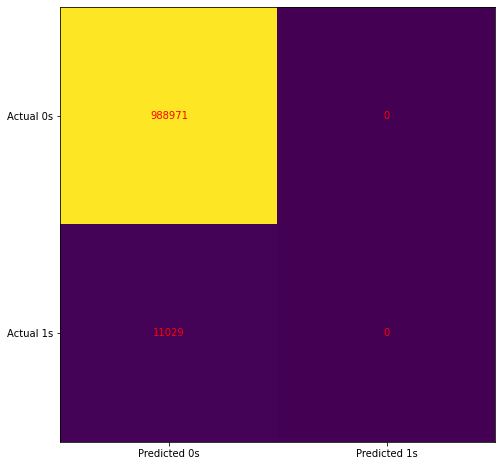

In [ ]:
cm = confusion_matrix(fraudArray, model.predict(lengthArray))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

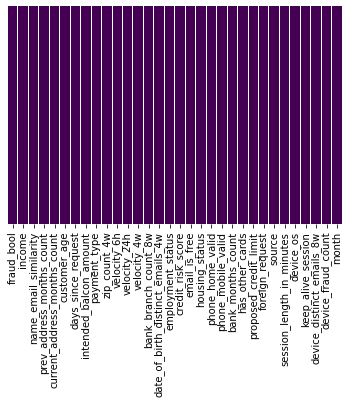

In [ ]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

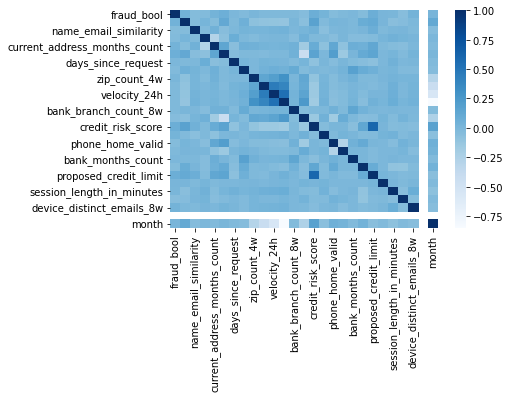

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False) 

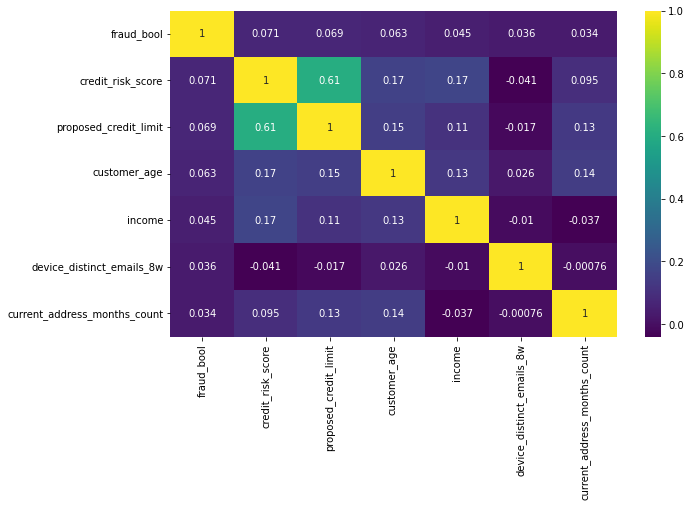

In [ ]:
k = 7
cols = df.corr().nlargest(k, 'fraud_bool')['fraud_bool'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

KeyboardInterrupt: ignored

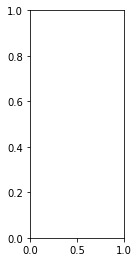

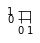

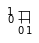

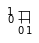

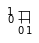

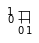

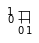

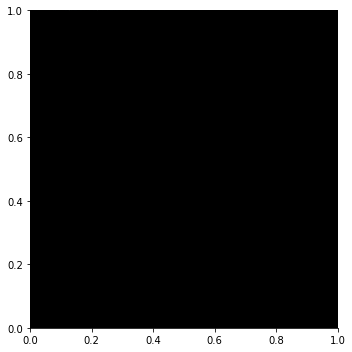

In [ ]:
l = df.columns.values
number_of_columns= 27
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.displot(df[l[i]],kde=True) 

In [ ]:
df2 = df.copy()
df2.drop(columns = ["fraud_bool", "payment_type", "employment_status", "housing_status", "source", "device_os", 'phone_home_valid'], inplace = True)
df2.drop([10,999999], axis=0, inplace=True)
x = df2
y = list(df.fraud_bool.values)
y.remove(0)
y.remove(0)

logreg = LogisticRegression(max_iter = 1000)
from sklearn.feature_selection import RFE
rfe = RFE(logreg)
rfe = rfe.fit(x, y)

#model = LogisticRegression(max_iter = 1000).fit(x, y)



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

KeyboardInterrupt: ignored

In [ ]:
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)
Kmean.cluster_centers_
plt.scatter(X[ : , 0], X[ : , 1], s =50, c=’b’)
plt.scatter(-0.94665068, -0.97138368, s=200, c=’g’, marker=’s’)
plt.scatter(2.01559419, 2.02597093, s=200, c=’r’, marker=’s’)
plt.show()
Kmean.labels_
sample_test=np.array([-3.0,-3.0])
second_test=sample_test.reshape(1, -1)
Kmean.predict(second_test)


SyntaxError: ignored